In [113]:
#Q1
install.packages("stringr")


Warning message:
"package 'stringr' is in use and will not be installed"


In [114]:
#Q2
pairs <- read.csv("~/pairs.csv")
head(pairs)

,currency_pair_name,currency_pair_code,history_first_trading_month
,<chr>,<chr>,<int>
1,EUR/USD,eurusd,200005
2,EUR/CHF,eurchf,200203
3,EUR/GBP,eurgbp,200203
4,EUR/JPY,eurjpy,200203
5,EUR/AUD,euraud,200208
6,USD/CAD,usdcad,200006


In [115]:
#Q3
library(stringr)
split <- str_split(pairs$currency_pair_name , "/")
head(split)

[[1]]
[1] "EUR" "USD"

[[2]]
[1] "EUR" "CHF"

[[3]]
[1] "EUR" "GBP"

[[4]]
[1] "EUR" "JPY"

[[5]]
[1] "EUR" "AUD"

[[6]]
[1] "USD" "CAD"

In [116]:
#Q4
foreign_ccy <- sapply(split,"[",1)
head(foreign_ccy)
foreign_ccy_list <- lapply(foreign_ccy,tail,1)
head(foreign_ccy_list)


[1] "EUR" "EUR" "EUR" "EUR" "EUR" "USD"

[[1]]
[1] "EUR"

[[2]]
[1] "EUR"

[[3]]
[1] "EUR"

[[4]]
[1] "EUR"

[[5]]
[1] "EUR"

[[6]]
[1] "USD"

In [117]:
#Q5
pairs$foreign_ccy = foreign_ccy_list
domestic_ccy <- sapply(split,"[",2)
domestic_ccy_list <- lapply(domestic_ccy,tail,1)
pairs$domestic_ccy = domestic_ccy_list
head(pairs)


,currency_pair_name,currency_pair_code,history_first_trading_month,foreign_ccy,domestic_ccy
,<chr>,<chr>,<int>,<list>,<list>
1,EUR/USD,eurusd,200005,EUR,USD
2,EUR/CHF,eurchf,200203,EUR,CHF
3,EUR/GBP,eurgbp,200203,EUR,GBP
4,EUR/JPY,eurjpy,200203,EUR,JPY
5,EUR/AUD,euraud,200208,EUR,AUD
6,USD/CAD,usdcad,200006,USD,CAD


In [118]:
#Q6
library(dplyr)
pairs_USD <- filter(pairs, pairs$domestic_ccy=="USD")
head(pairs_USD)
pairs_USD <- select(pairs_USD, "foreign_ccy", "domestic_ccy")
head(pairs_USD)


,currency_pair_name,currency_pair_code,history_first_trading_month,foreign_ccy,domestic_ccy
,<chr>,<chr>,<int>,<list>,<list>
1,EUR/USD,eurusd,200005,EUR,USD
2,GBP/USD,gbpusd,200005,GBP,USD
3,AUD/USD,audusd,200006,AUD,USD
4,NZD/USD,nzdusd,200508,NZD,USD
5,XAU/USD,xauusd,200903,XAU,USD
6,SPX/USD,spxusd,201011,SPX,USD


,foreign_ccy,domestic_ccy
,<list>,<list>
1,EUR,USD
2,GBP,USD
3,AUD,USD
4,NZD,USD
5,XAU,USD
6,SPX,USD


In [119]:
#Q7
domestic_count <- pairs %>%
    count(domestic_ccy)
domestic_count <- data.frame(domestic_count)
head(domestic_count)


,domestic_ccy,n
,<list>,<int>
1,USD,11
2,CHF,7
3,GBP,3
4,JPY,10
5,AUD,4
6,CAD,5


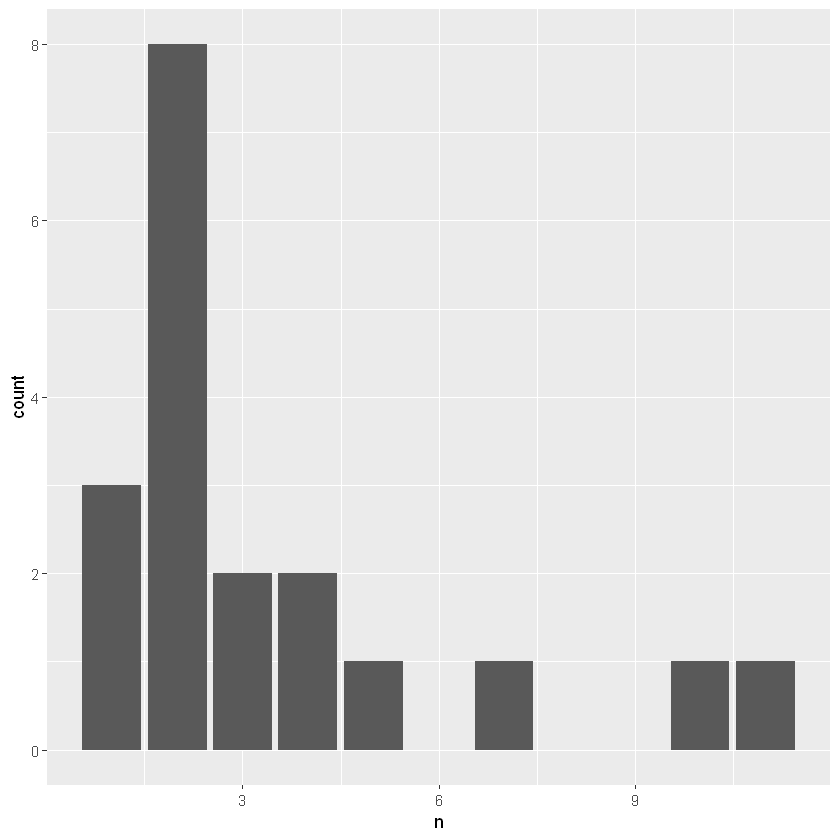

In [160]:
#Q8
library(ggplot2)
ggplot(data = domestic_count, aes(domestic_ccy)) + geom_bar()

In [203]:
x<-TRUE
y<-FALSE

In [212]:
#Q9
domestic_count_oldnew <- pairs %>% mutate(
    oldnew = if(oldnew
    }
    else {
        print('old')
        }
) %>% count(domestic_ccy, 72
           )

head(domestic_count_oldnew)

Warning message in if (history_first_trading_month < 201001) {:
"the condition has length > 1 and only the first element will be used"


[1] "new"


,domestic_ccy,oldnew,n
,<list>,<chr>,<int>
1,USD,new,11
2,CHF,new,7
3,GBP,new,3
4,JPY,new,10
5,AUD,new,4
6,CAD,new,5


In [213]:
#Q9
domestic_count_oldnew <- pairs %>% mutate(
    oldnew = history_first_trading_month < 201001,
) %>% count(domestic_ccy, oldnew)
head(domestic_count_oldnew)

,domestic_ccy,oldnew,n
,<list>,<lgl>,<int>
1,USD,FALSE,5
2,USD,TRUE,6
3,CHF,TRUE,7
4,GBP,FALSE,1
5,GBP,TRUE,2
6,JPY,FALSE,2


Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs introduced by coercion"
Warning message in pmin(y, 0):
"NAs intr

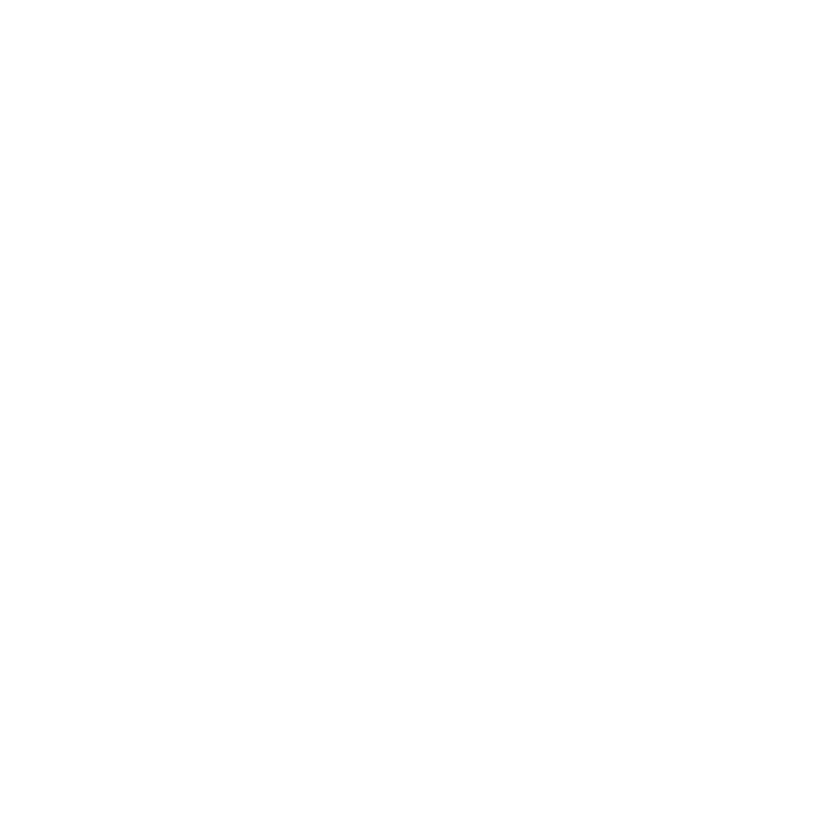

In [199]:
#Q10
ggplot(data = domestic_count_oldnew, aes(x=old, colour = "ccy" )) + geom_bar(position= 'dodge',stat='identity')

In [48]:
#Q11
install.packages("sparklyr")
library(sparklyr)
spark_install()
sc = spark_connect(master = "local")
pairs_tbl <- copy_to(sc, pairs, overwrite = TRUE)

Installing package into 'C:/Users/Saqeeb/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'cli', 'dplyr', 'dbplyr'





  There are binary versions available but the source versions are later:
         binary source needs_compilation
cli       3.2.0  3.3.0              TRUE
dplyr     1.0.8  1.0.9              TRUE
dbplyr    2.1.1  2.2.1             FALSE
sparklyr  1.7.5  1.7.7             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Saqeeb\Documents\R\win-library\4.0\00LOCK\cli\libs\x64\cli.dll to C:\Users\Saqeeb\Documents\R\win-library\4.0\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Saqeeb\Documents\R\win-library\4.0\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Saqeeb\Documents\R\win-library\4.0\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Saqeeb\AppData\Local\Temp\RtmpYRg3jt\downloaded_packages


installing the source packages 'dbplyr', 'sparklyr'


Warning message in install.packages("sparklyr"):
"installation of package 'dbplyr' had non-zero exit status"
Warning message in install.packages("sparklyr"):
"installation of package 'sparklyr' had non-zero exit status"
Warning message:
"package 'sparklyr' was built under R version 4.2.1"


ERROR: Error: package or namespace load failed for 'sparklyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'dbplyr' 1.4.4 is being loaded, but >= 2.1.1 is required


In [36]:
#Q12

exchangeable <- select(pairs_tbl, foreign_ccy, domestic_ccy)
transmute(exchangeable, src= foreign_ccy, dst = domestic_ccy)

src,dst
<list>,<list>
EUR,USD
EUR,CHF
EUR,GBP
EUR,JPY
EUR,AUD
USD,CAD
USD,CHF
USD,JPY
USD,MXN
